In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

En el archivo "processed.cleveland.data" se tiene un conjunto de datos que permite detectar si una persona tiene una enfermedad cardíaca basado en su edad, sexo, etc. Su variable target "hd" tiene 5 categorías: 0 corresponde a la ausencia de enfermedad y las otras categorías a diferentes niveles de enfermedad.

En este caso nos interesa sólo presencia y ausencia de enfermedad cardíaca. Entrenar árboles de decisión con diferentes profundidades para obtener el mejor desempeño del modelo.

Descripción de los atributos:
- **age: float**
- **sex: Category**
    - 0 = female
    - 1 = male
- **cp**: chest pain **Category**
    - 1: typical angina
    - 2: atypical angina
    - 3: non-anginal pain
    - 4: asymptomatic
- **trestbps**: resting blood pressure (mm Hg) **Float**
- **chol**: serum cholestoral in mg/dl **Float**
- **fbs**: fasting blood sugar, **Category**
    - 1 = < 120 mg/dl
    - 0 = >=120 mg/dl
- **restecg**: resting electrocardiographic results, **Category**
    - Value 0: normal
    - Value 1: having ST-T wave abnormality
    - Value 2: showing probable or definite left ventricular hypertrophy
- **thalach**: maximum heart rate achieved, **Float**
- **exang**: exercise induced angina **Category**
    - 1 = yes
    - 0 = no
- **oldpeak** = ST depression induced by exercise relative to rest **Float**
- **slope**: the slope of the peak exercise ST segment, **Category**
    - 1: upsloping
    - 2: flat
    - 3: downsloping
- **ca**: number of major vessels (0-3) colored by flourosopy, **Float**
- **thal**: **Category**
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect

Usar el parametro "dtypes" de pandas para ver los tipos de datos de los atributos. Ver si los mismos coinciden con los tipos de datos indicados arriba, **object** sugiere la posibilidad de mezcla de tipos de datos en las variables. En estos casos usar el método "unique()" sobre la columna para inspeccionar los valores.

Los **árboles de decisión** pueden lidiar tanto con datos numericos como categóricos. Sin embargo, la implementación de scikit-learn no soporta variables categóricas. Para poder utilizar **árboles de decisión de sklearn** debemos convertir los datos categóricos en variables dummy (**One-Hot Encoding**)

**¿Cual es el problema de usar valores continuos como datos categóricos?**

Analizando la característica **cp**, veremos 4 opciones
- 1: typical angina
- 2: atypical angina
- 3: non-anginal pain
- 4: asymptomatic

Si dejamos estas categorías como valores continuos, asumimos que 4 ('asymptomatic') es más parecido a 3 ('non-anginal pain') que por ejemplo a 1('typical angina') y el árbol de decisión tendería a juntar estas dos categorías. Sin embargo, la probabilidad de juntar cualquier 2 categorías es la misma. Tener esto en cuenta y usar **One-Hot Encoding**

Para este ejercicio es mucho más simple usar el método [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) de pandas para hacer la conversión **One-Hot Encoding**

In [95]:
#nombres de las columnas
columns= ['age',
             'sex',
             'cp',
             'trestbps',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd'
        ]

In [96]:
df = pd.read_csv('../data/processed.cleveland.data', header=None, names=columns)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [98]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [99]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [100]:
debenSerCat = [
    "sex",
    "cp",
    "fbs",
    "restecg",
    "exang",
    "slope"
]

In [101]:
for atr in debenSerCat:
  serie = df[atr]
  df.drop(atr, axis=1, inplace=True)
  df_dummy = pd.get_dummies(serie, prefix=f"{atr}")
  df = pd.concat([df, df_dummy], axis=1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   trestbps     303 non-null    float64
 2   chol         303 non-null    float64
 3   thalach      303 non-null    float64
 4   oldpeak      303 non-null    float64
 5   ca           303 non-null    object 
 6   thal         303 non-null    object 
 7   hd           303 non-null    int64  
 8   sex_0.0      303 non-null    uint8  
 9   sex_1.0      303 non-null    uint8  
 10  cp_1.0       303 non-null    uint8  
 11  cp_2.0       303 non-null    uint8  
 12  cp_3.0       303 non-null    uint8  
 13  cp_4.0       303 non-null    uint8  
 14  fbs_0.0      303 non-null    uint8  
 15  fbs_1.0      303 non-null    uint8  
 16  restecg_0.0  303 non-null    uint8  
 17  restecg_1.0  303 non-null    uint8  
 18  restecg_2.0  303 non-null    uint8  
 19  exang_0.

In [103]:
df.drop(df[df["ca"] == '?'].index, inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 301
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          299 non-null    float64
 1   trestbps     299 non-null    float64
 2   chol         299 non-null    float64
 3   thalach      299 non-null    float64
 4   oldpeak      299 non-null    float64
 5   ca           299 non-null    object 
 6   thal         299 non-null    object 
 7   hd           299 non-null    int64  
 8   sex_0.0      299 non-null    uint8  
 9   sex_1.0      299 non-null    uint8  
 10  cp_1.0       299 non-null    uint8  
 11  cp_2.0       299 non-null    uint8  
 12  cp_3.0       299 non-null    uint8  
 13  cp_4.0       299 non-null    uint8  
 14  fbs_0.0      299 non-null    uint8  
 15  fbs_1.0      299 non-null    uint8  
 16  restecg_0.0  299 non-null    uint8  
 17  restecg_1.0  299 non-null    uint8  
 18  restecg_2.0  299 non-null    uint8  
 19  exang_0.

In [105]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [106]:
df["ca"] = pd.to_numeric(df["ca"])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 301
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          299 non-null    float64
 1   trestbps     299 non-null    float64
 2   chol         299 non-null    float64
 3   thalach      299 non-null    float64
 4   oldpeak      299 non-null    float64
 5   ca           299 non-null    float64
 6   thal         299 non-null    object 
 7   hd           299 non-null    int64  
 8   sex_0.0      299 non-null    uint8  
 9   sex_1.0      299 non-null    uint8  
 10  cp_1.0       299 non-null    uint8  
 11  cp_2.0       299 non-null    uint8  
 12  cp_3.0       299 non-null    uint8  
 13  cp_4.0       299 non-null    uint8  
 14  fbs_0.0      299 non-null    uint8  
 15  fbs_1.0      299 non-null    uint8  
 16  restecg_0.0  299 non-null    uint8  
 17  restecg_1.0  299 non-null    uint8  
 18  restecg_2.0  299 non-null    uint8  
 19  exang_0.

In [108]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [109]:
df.drop(df[df["thal"] == '?'].index, inplace=True)

In [110]:
df["thal"] = pd.to_numeric(df["thal"])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   trestbps     297 non-null    float64
 2   chol         297 non-null    float64
 3   thalach      297 non-null    float64
 4   oldpeak      297 non-null    float64
 5   ca           297 non-null    float64
 6   thal         297 non-null    float64
 7   hd           297 non-null    int64  
 8   sex_0.0      297 non-null    uint8  
 9   sex_1.0      297 non-null    uint8  
 10  cp_1.0       297 non-null    uint8  
 11  cp_2.0       297 non-null    uint8  
 12  cp_3.0       297 non-null    uint8  
 13  cp_4.0       297 non-null    uint8  
 14  fbs_0.0      297 non-null    uint8  
 15  fbs_1.0      297 non-null    uint8  
 16  restecg_0.0  297 non-null    uint8  
 17  restecg_1.0  297 non-null    uint8  
 18  restecg_2.0  297 non-null    uint8  
 19  exang_0.

df.describe()

In [112]:
df["hd"] = df["hd"] != 0

In [113]:
df["hd"].replace({
    True : "presencia de enfermedad",
    False : "ausencia de enfermedad"
}, inplace=True) 

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   trestbps     297 non-null    float64
 2   chol         297 non-null    float64
 3   thalach      297 non-null    float64
 4   oldpeak      297 non-null    float64
 5   ca           297 non-null    float64
 6   thal         297 non-null    float64
 7   hd           297 non-null    object 
 8   sex_0.0      297 non-null    uint8  
 9   sex_1.0      297 non-null    uint8  
 10  cp_1.0       297 non-null    uint8  
 11  cp_2.0       297 non-null    uint8  
 12  cp_3.0       297 non-null    uint8  
 13  cp_4.0       297 non-null    uint8  
 14  fbs_0.0      297 non-null    uint8  
 15  fbs_1.0      297 non-null    uint8  
 16  restecg_0.0  297 non-null    uint8  
 17  restecg_1.0  297 non-null    uint8  
 18  restecg_2.0  297 non-null    uint8  
 19  exang_0.

## Entrenamiento de arboles

In [115]:
profundidades = np.arange(4, 50, 3)

In [116]:
profundidades

array([ 4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])

In [117]:
target = df["hd"]
df.drop("hd", axis=1, inplace=True)

In [118]:
target

0       ausencia de enfermedad
1      presencia de enfermedad
2      presencia de enfermedad
3       ausencia de enfermedad
4       ausencia de enfermedad
                ...           
297    presencia de enfermedad
298    presencia de enfermedad
299    presencia de enfermedad
300    presencia de enfermedad
301    presencia de enfermedad
Name: hd, Length: 297, dtype: object

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          297 non-null    float64
 1   trestbps     297 non-null    float64
 2   chol         297 non-null    float64
 3   thalach      297 non-null    float64
 4   oldpeak      297 non-null    float64
 5   ca           297 non-null    float64
 6   thal         297 non-null    float64
 7   sex_0.0      297 non-null    uint8  
 8   sex_1.0      297 non-null    uint8  
 9   cp_1.0       297 non-null    uint8  
 10  cp_2.0       297 non-null    uint8  
 11  cp_3.0       297 non-null    uint8  
 12  cp_4.0       297 non-null    uint8  
 13  fbs_0.0      297 non-null    uint8  
 14  fbs_1.0      297 non-null    uint8  
 15  restecg_0.0  297 non-null    uint8  
 16  restecg_1.0  297 non-null    uint8  
 17  restecg_2.0  297 non-null    uint8  
 18  exang_0.0    297 non-null    uint8  
 19  exang_1.

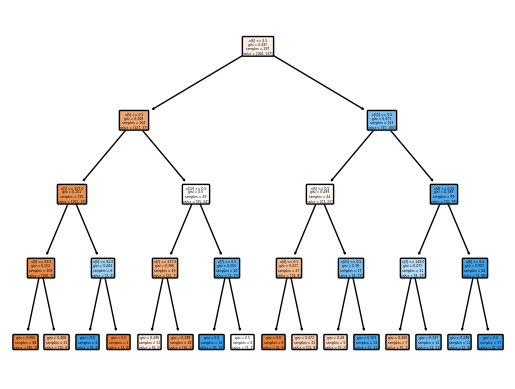

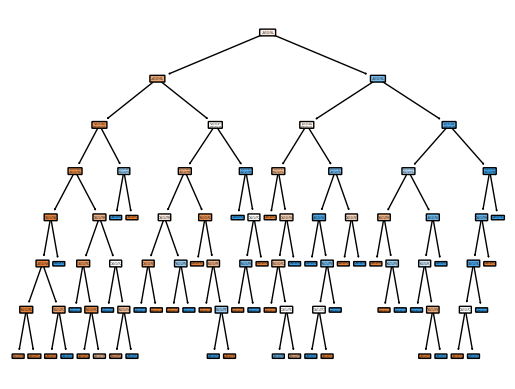

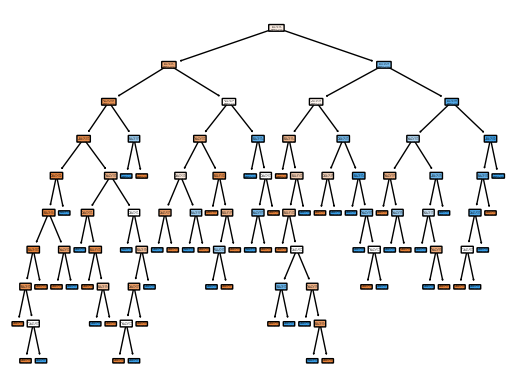

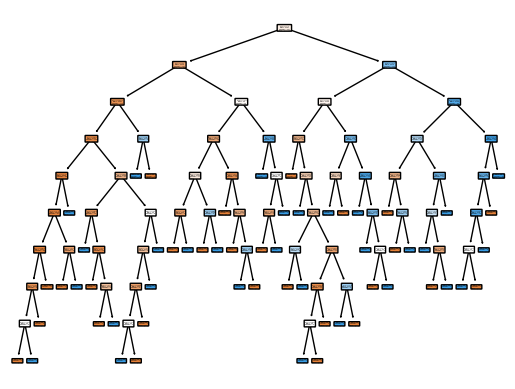

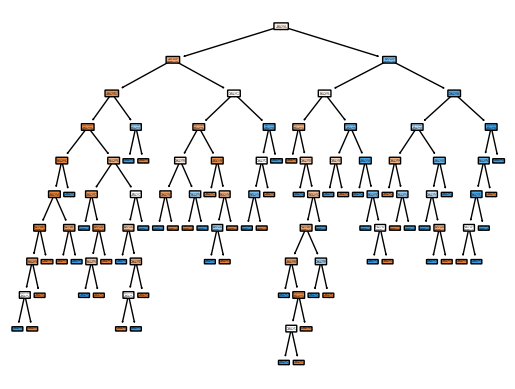

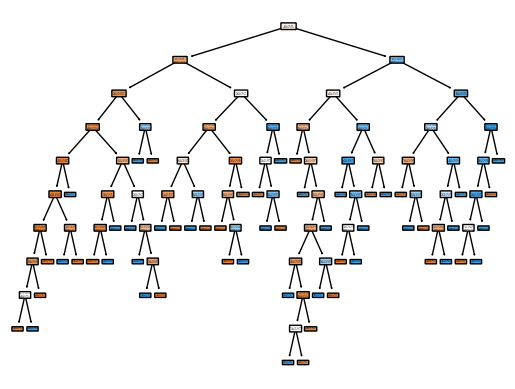

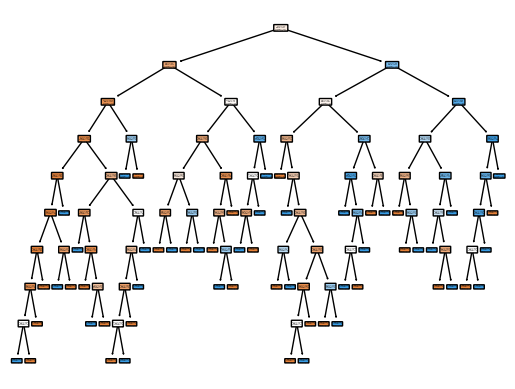

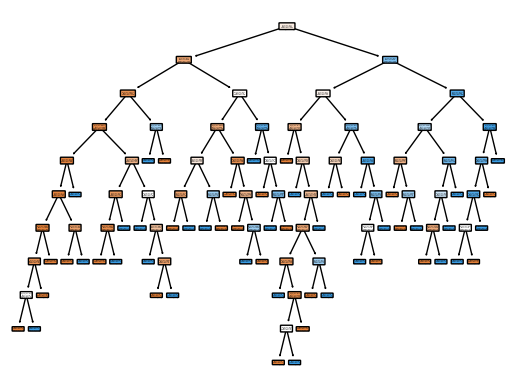

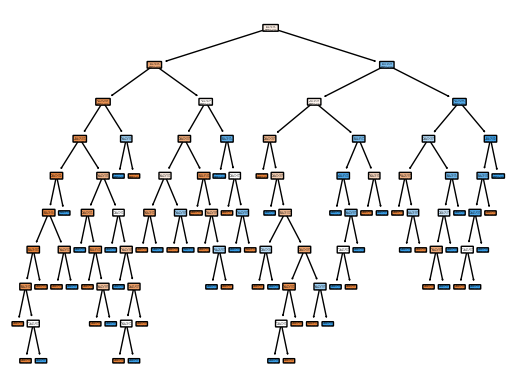

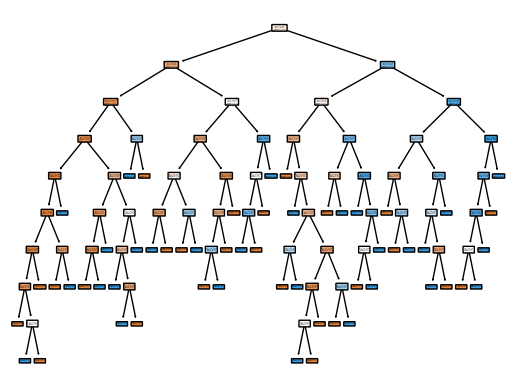

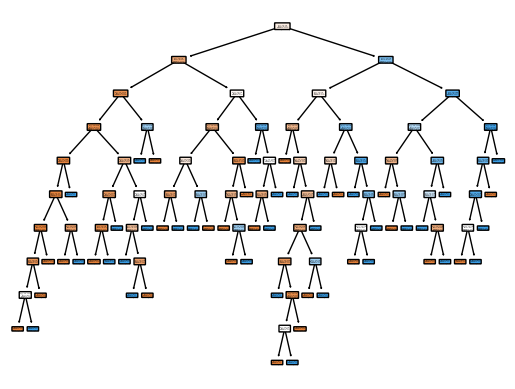

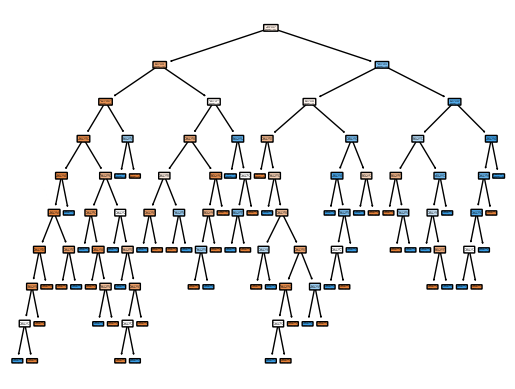

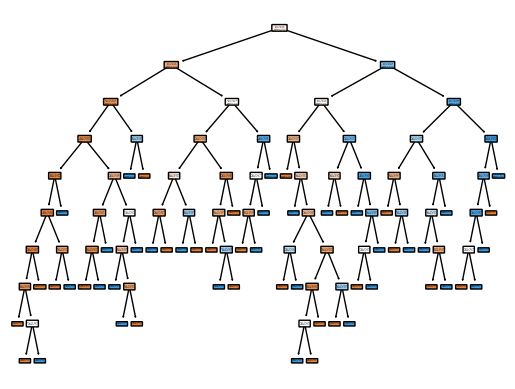

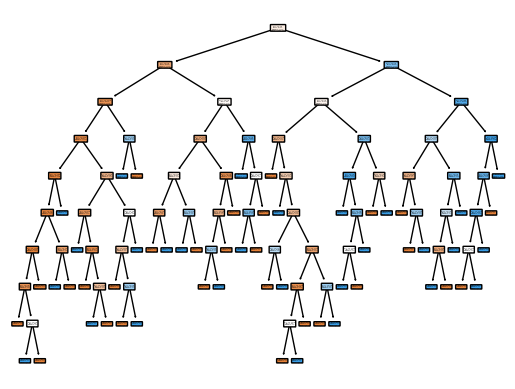

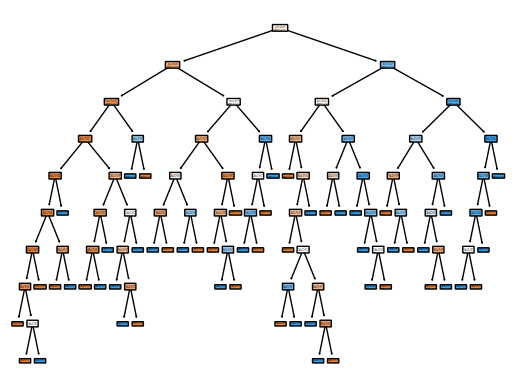

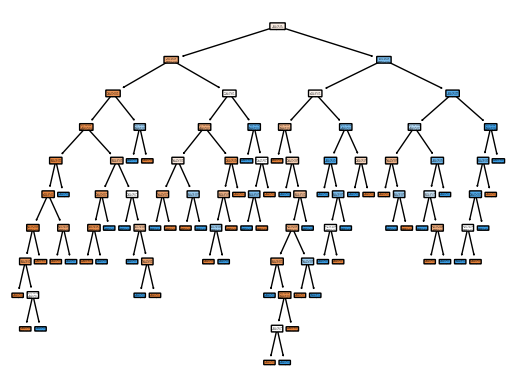

In [122]:
for profundidad in profundidades:
    tree_clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_clf.fit(df, target)
    plot_tree(tree_clf,
             filled=True,
             rounded=True)
    plt.show()

In [134]:
from sklearn.model_selection import GridSearchCV

In [137]:
arbol = DecisionTreeClassifier()
paramArbol = {'max_depth':profundidades}
gridArbol = GridSearchCV(arbol, paramArbol)

In [138]:
gridArbol.fit(df, target)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49])})

In [140]:
gridArbol.best_params_

{'max_depth': 4}

In [141]:
mejorArbol = gridArbol.best_estimator_

In [142]:
mejorArbol

DecisionTreeClassifier(max_depth=4)

In [143]:
from sklearn.metrics import accuracy_score

y_pred = mejorArbol.predict(df)
accuracy_score(target, y_pred)

0.8754208754208754

In [147]:
for profundidad in profundidades:
    tree_clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_clf.fit(df, target)
    y_pred = tree_clf.predict(df)
    print(f"Prof: {profundidad}  Acc: ", accuracy_score(target, y_pred))

Prof: 4  Acc:  0.8754208754208754
Prof: 7  Acc:  0.9797979797979798
Prof: 10  Acc:  1.0
Prof: 13  Acc:  1.0
Prof: 16  Acc:  1.0
Prof: 19  Acc:  1.0
Prof: 22  Acc:  1.0
Prof: 25  Acc:  1.0
Prof: 28  Acc:  1.0
Prof: 31  Acc:  1.0
Prof: 34  Acc:  1.0
Prof: 37  Acc:  1.0
Prof: 40  Acc:  1.0
Prof: 43  Acc:  1.0
Prof: 46  Acc:  1.0
Prof: 49  Acc:  1.0
